# Project 2: Investigating the Guns Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov. I will be investigating the following questions: 


Which states have had the greatest increase in gun permits between 1999 and 2016? 

What is the overall trend of gun transactions between 1999 and 2016?

<a id='intro'></a>
## Introduction

This analysis will explore which states have had the greatest increase in permite between 1999 and 2016. 
In addition, this analysis will explore the overall trends in gun trascations between 1999 and 2016.

<a id='wrangling'></a>
## Data Wrangling

In [268]:
# Import statements for all of the packages that will be used for this analysis.

import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


UsageError: Line magic function `%` not found.


In [269]:
# Loading in the Guns excel data file. 

df_guns = pd.read_excel('/Users/holly/Desktop/PyJupyterNB/UDACITY Data Analyst/Project2/gun_data.xlsx')

In [270]:
#Print head of the guns data file to inspect the data.
df_guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [271]:
#Inspect number of columns and rows.
df_guns.shape

(12485, 27)

shape allows us to quickly see that the dataset has 12485 rows and 27 columns of data.

In [272]:
#Check to see if there are missing values.
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

info() provides each column name, number of non-null values so we can easily identify if the dataset has missing values, and the datatype for each column.

In [273]:
#Check data types
df_guns.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

Alternatively, we could use dtypes to quickly identify the datatype of each column.

In [274]:
#Check for duplicate rows
sum(df_guns.duplicated())

0

The duplicated() function allows us to identify if there are duplicate rows of data in the dataset.

In [275]:
#Look at descriptive statistics for each column.
df_guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


The describe() function is a powerful function that provides descriptive statistics for each column of data. This is helpful for identifying min/max values that may turn out to be outliers in the data. The count provides the number of values in each column, the mean of the data in the column and the standard deviation, how far the data deviates from the mean. 

In [276]:
#As a first step, I am going to replace all of the missing values with the mean of the exisitng data. 
df_guns.fillna(df_guns.mean(), inplace=True)

In [277]:
#Next I check the non-null counts using the info() function to ensure code worked properly and addressed all missing values. We now see 12485 values for each column.
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12485 non-null  float64
 3   permit_recheck             12485 non-null  float64
 4   handgun                    12485 non-null  float64
 5   long_gun                   12485 non-null  float64
 6   other                      12485 non-null  float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12485 non-null  float64
 9   prepawn_handgun            12485 non-null  float64
 10  prepawn_long_gun           12485 non-null  float64
 11  prepawn_other              12485 non-null  float64
 12  redemption_handgun         12485 non-null  float64
 13  redemption_long_gun        12485 non-null  flo

Next, I use the split function to deconstruct the values held by the month field by splitting on the "-" symbol so that I can create separate fields for month and year as this will be necessary for my analysis. I create the df_guns_new dataframe to hold each of these values and then add the new month_no and year columns to the original df_guns dataframe, preserving the original 'month' column in case I need it later.

In [278]:
# new data frame with split value columns 
df_guns_new = df_guns['month'].str.split("-", n = 1, expand = True) 
  
# making separate year column from df_guns_new data frame 
df_guns['year']= df_guns_new[0] 
  
# making separate month_no column from df_guns_new data frame 
df_guns['month_no']= df_guns_new[1] 

In [279]:
#Next, I will check to make sure that the changes that I intended to make to the df were processed correctly. 
#I see that the 'month' field still exists in the df and that the two new columns have been added to the end, year and month_no.
df_guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,month_no
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,09
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,09
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,09
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017,09
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017,09


In [280]:
#Next, I convert the permit field from a float to an integer.
df_guns['permit'] = df_guns['permit'].astype(int)

In [281]:
#I use the dtypes function to confirm that the data type for permit has been updated from a float to an integer.
df_guns.dtypes

month                         object
state                         object
permit                         int64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
y

In [282]:
#Since I will be exploring which states had the greatest increase in permits over time, 
#I need to determine which years I will be looking at by identifying the first and last year in the dataset.
min_year = df_guns['year'].min()
min_year




'1998'

The fist year of data begins with 1998.

In [283]:
#I check to see what the first month of the first year is. 
df_guns_totals_1998 = df_guns['month'].min()
df_guns_totals_1998

'1998-11'

I see that the 1998 records do not begin until November. With incomplete data for 1998, any visualizations may be skewed by the low numbers displayed for 1998. For this reason, it would be better to start the analysis at the first full year.

In [284]:
#I check to see what the last year of data is in the dataset.
max_year = df_guns['year'].max()
max_year

'2017'

In [285]:
#I check to see what the last year of data is in the dataset is complete.
df_guns_totals_2017 = df_guns['month'].max()
df_guns_totals_2017

'2017-09'

2017 is the last year in the dataset, but the data stops in September. Since 2017 is incomplerte, this may skew the analysis and possibly show a large decrease for the last year. Again, it may better to only look at years with complete data or look at averages.

In [286]:
#Finally I check to see if the other years represented in the data have data for each month.
df_guns_months = df_guns.groupby('year')['month'].count()
df_guns_months

year
1998    110
1999    660
2000    660
2001    660
2002    660
2003    660
2004    660
2005    660
2006    660
2007    660
2008    660
2009    660
2010    660
2011    660
2012    660
2013    660
2014    660
2015    660
2016    660
2017    495
Name: month, dtype: int64

    By grouping the data by month and year, I am easily able to see that 1998 and 2107 do not have data for all months of the year, but that all other years do. As a result, I will conduct my analysis between 1999 and 2016.

<a id='eda'></a>
## Exploratory Data Analysis


Research Question #1: Which states have had the greatest increase in gun permits between 1999 and 2016? 

In [287]:
# I query df_guns to pull all records for 1999.
df_guns_1999 = df_guns.query('year == "1999"')
df_guns_1999

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,month_no
11715,1999-12,Alabama,0,1165.956364,10923.0,29890.0,360.471636,370,0.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,41183,1999,12
11716,1999-12,Alaska,0,1165.956364,1354.0,2833.0,360.471636,77,0.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,4264,1999,12
11717,1999-12,Arizona,1300,1165.956364,9128.0,10665.0,360.471636,373,55.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,21521,1999,12
11718,1999-12,Arkansas,372,1165.956364,5482.0,19908.0,360.471636,296,0.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,26058,1999,12
11719,1999-12,California,9163,1165.956364,49418.0,77697.0,360.471636,0,0.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,136278,1999,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12370,1999-01,Virginia,0,1165.956364,6298.0,7556.0,360.471636,127,28.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,14009,1999,01
12371,1999-01,Washington,800,1165.956364,1891.0,5780.0,360.471636,149,75.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,8695,1999,01
12372,1999-01,West Virginia,0,1165.956364,2989.0,5118.0,360.471636,153,0.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,8260,1999,01
12373,1999-01,Wisconsin,0,1165.956364,2709.0,5063.0,360.471636,8,0.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,7780,1999,01


In [288]:
#I group the 1999 records by state and total permits for the year to determine how many permits were issued 
#by each state in 1999.
gun_permits_1999 = df_guns_1999.groupby(['state'])['permit'].sum( )
df_guns_99permit = pd.DataFrame(gun_permits_1999) 
df_guns_99permit

,permit
state,
Alabama,0
Alaska,2
Arizona,20503
Arkansas,4271
California,101132
Colorado,2
Connecticut,41462
Delaware,0
District of Columbia,0


In [289]:
# I query df_guns to pull all records for 2016.
df_guns_2016 = df_guns.query('year == "2016"')
df_guns_2016

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,month_no
495,2016-12,Alabama,26996,0.000000,13733.0,17519.0,376.0,533,0.0,10.0,...,0.000000,2.0,2.0,1.0,0.0,0.0,0.0,62014,2016,12
496,2016-12,Alaska,254,0.000000,4087.0,3698.0,243.0,191,0.0,3.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,8786,2016,12
497,2016-12,Arizona,8900,121.000000,18024.0,13785.0,1180.0,703,0.0,10.0,...,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,44887,2016,12
498,2016-12,Arkansas,3294,692.000000,9192.0,13433.0,277.0,385,37.0,4.0,...,0.000000,2.0,7.0,0.0,0.0,0.0,0.0,29926,2016,12
499,2016-12,California,61808,0.000000,63649.0,93224.0,77929.0,0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,298161,2016,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-01,Virginia,524,1165.956364,27033.0,15699.0,922.0,0,0.0,0.0,...,0.087273,0.0,0.0,0.0,0.0,0.0,0.0,44181,2016,01
1151,2016-01,Washington,19688,1165.956364,20427.0,11355.0,2147.0,595,4.0,10.0,...,0.087273,555.0,458.0,29.0,5.0,11.0,0.0,58050,2016,01
1152,2016-01,West Virginia,3378,1165.956364,7419.0,5505.0,321.0,349,3.0,5.0,...,0.087273,5.0,7.0,2.0,0.0,0.0,0.0,18985,2016,01
1153,2016-01,Wisconsin,9496,1165.956364,17969.0,10756.0,937.0,42,0.0,0.0,...,0.087273,6.0,5.0,0.0,0.0,1.0,0.0,39561,2016,01


In [290]:
#I group the 2016 records by state and total permits for the year to determine how many permits were issued 
#by each state in 2016.
gun_permits_2016 = df_guns_2016.groupby(['state'])['permit'].sum( )
df_guns_2016permit = pd.DataFrame(gun_permits_2016) 
df_guns_2016permit

,permit
state,
Alabama,291039
Alaska,3121
Arizona,87771
Arkansas,55456
California,1036981
Colorado,85087
Connecticut,148949
Delaware,8440
District of Columbia,144


In [291]:
#Next, I merge the 1999 and 2016 permits counts by state.
df_guns_permit = df_guns_2016permit.merge(df_guns_99permit, left_on="state", right_on="state", how='left')
df_guns_permit

,permit_x,permit_y
state,,
Alabama,291039,0
Alaska,3121,2
Arizona,87771,20503
Arkansas,55456,4271
California,1036981,101132
Colorado,85087,2
Connecticut,148949,41462
Delaware,8440,0
District of Columbia,144,0


In [292]:
#I rename the 2016 permit counts column to 2016_permit_sum so the name is more representative of the data stored in that column.
df_guns_permit['2016_permit_sum'] = df_guns_permit['permit_x']
df_guns_permit

,permit_x,permit_y,2016_permit_sum
state,,,
Alabama,291039,0,291039
Alaska,3121,2,3121
Arizona,87771,20503,87771
Arkansas,55456,4271,55456
California,1036981,101132,1036981
Colorado,85087,2,85087
Connecticut,148949,41462,148949
Delaware,8440,0,8440
District of Columbia,144,0,144


In [293]:
#I rename the 1999 permit counts column to 1999_permit_sum so the name is more representative of the data stored in that column.
df_guns_permit['1999_permit_sum'] = df_guns_permit['permit_y']
df_guns_permit

,permit_x,permit_y,2016_permit_sum,1999_permit_sum
state,,,,
Alabama,291039,0,291039,0
Alaska,3121,2,3121,2
Arizona,87771,20503,87771,20503
Arkansas,55456,4271,55456,4271
California,1036981,101132,1036981,101132
Colorado,85087,2,85087,2
Connecticut,148949,41462,148949,41462
Delaware,8440,0,8440,0
District of Columbia,144,0,144,0


In [294]:
#After renaming the permit_x column, I drop the original column, permit_x.
permit_sum1 = df_guns_permit.drop(columns=['permit_x'])

In [295]:
#After renaming the permit_y column, I drop the original column, permit_y.
permit_sum2 = permit_sum1.drop(columns=['permit_y'])

In [296]:
#Next, I create a permit_diff column to determine the difference between the sum of permits in 1999 to 2016.
permit_sum2['permit_diff'] = permit_sum2['2016_permit_sum'] - permit_sum2['1999_permit_sum']
permit_sum2

,2016_permit_sum,1999_permit_sum,permit_diff
state,,,
Alabama,291039,0,291039
Alaska,3121,2,3119
Arizona,87771,20503,67268
Arkansas,55456,4271,51185
California,1036981,101132,935849
Colorado,85087,2,85085
Connecticut,148949,41462,107487
Delaware,8440,0,8440
District of Columbia,144,0,144


In [297]:
#I referenced this site as a reminder for how to sort in descedning order to easily identify the states witht he greatest
#increase in permits between 1999 and 2016 (permit_diff). 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

all_permit_diff = permit_sum2.sort_values(by=['permit_diff'], ascending=False)[:10]

all_permit_diff

,2016_permit_sum,1999_permit_sum,permit_diff
state,,,
Kentucky,3372613,0,3372613
Indiana,946912,0,946912
California,1036981,101132,935849
Illinois,962930,296607,666323
Florida,337086,0,337086
Texas,390462,61171,329291
Pennsylvania,333755,10095,323660
Minnesota,350315,29783,320532
Alabama,291039,0,291039


In order to make the data easier to present and visualize, I decide to look at the top 10 states with the greatest increase in permits between 1999 and 2016. The chart shows that Kentucky had the greatest increase during this time period. However, I notice that based on the 1999 data, Kentucky either did not issue any permits that year, or the data was missing. I notice the same pattern for Indiana, Florida, and Alabama. To determine if there are anomalies with the data, further exploration is needed.

In [298]:
#Referenced this site for help with pivot table calls: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
#Used the pivot function to look at permits by state and month.
df_guns_month_year = df_guns.pivot(index=["state"], columns=["month"],values="permit")
df_guns_month_year


month,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
state,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,26996,25093,23900,27666,17958,18538,19508,18042,19733,16717
Alaska,4,0,0,0,0,2,0,0,0,0,...,254,185,137,362,289,247,242,222,247,209
Arizona,0,1733,1718,1828,2193,1933,1832,1714,1729,1576,...,8900,8117,7938,9556,7385,6628,6505,5606,6733,5069
Arkansas,0,0,1,10,25,391,569,390,407,505,...,3294,2512,3220,4775,3158,4137,3033,2564,3313,2935
California,434,4932,7311,5715,7591,9450,8609,9036,9063,8723,...,61808,62397,56533,65892,58147,58722,60142,52610,59528,57839
Colorado,0,0,0,0,0,0,0,0,2,0,...,5333,5619,6447,7030,5576,5408,4920,4392,5219,4356
Connecticut,17,2800,3010,4526,3689,5064,4556,3879,1926,3295,...,6527,6706,6436,8575,7557,8101,8290,6387,5896,4343
Delaware,0,0,0,0,0,0,0,0,0,0,...,320,736,692,835,689,863,533,305,288,275
District of Columbia,0,0,0,0,0,0,0,0,0,0,...,4,6,25,24,35,10,17,19,19,1


In [299]:
#Pull all records for 1999 through 2016 only.
df_guns_avg_permit_99to16 = df_guns.query('year > "1998" and year < "2017"')
df_guns_avg_permit_99to16

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,month_no
495,2016-12,Alabama,26996,0.000000,13733.0,17519.0,376.000000,533,0.0,10.000000,...,0.000000,2.000,2.000000,1.000000,0.00000,0.000000,0.000000,62014,2016,12
496,2016-12,Alaska,254,0.000000,4087.0,3698.0,243.000000,191,0.0,3.000000,...,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,8786,2016,12
497,2016-12,Arizona,8900,121.000000,18024.0,13785.0,1180.000000,703,0.0,10.000000,...,0.000000,2.000,2.000000,0.000000,0.00000,0.000000,0.000000,44887,2016,12
498,2016-12,Arkansas,3294,692.000000,9192.0,13433.0,277.000000,385,37.0,4.000000,...,0.000000,2.000,7.000000,0.000000,0.00000,0.000000,0.000000,29926,2016,12
499,2016-12,California,61808,0.000000,63649.0,93224.0,77929.000000,0,0.0,0.000000,...,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,298161,2016,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12370,1999-01,Virginia,0,1165.956364,6298.0,7556.0,360.471636,127,28.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,14009,1999,01
12371,1999-01,Washington,800,1165.956364,1891.0,5780.0,360.471636,149,75.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,8695,1999,01
12372,1999-01,West Virginia,0,1165.956364,2989.0,5118.0,360.471636,153,0.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,8260,1999,01
12373,1999-01,Wisconsin,0,1165.956364,2709.0,5063.0,360.471636,8,0.0,4.828021,...,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,7780,1999,01


In [300]:
#Find the average number of permits by state from 1999 to 2016.
df_guns_months_avg = df_guns_avg_permit_99to16.groupby('state')['permit'].mean()
df_guns_months_avg

state
Alabama                   3982.805556
Alaska                      51.888889
Arizona                   2987.217593
Arkansas                  2214.370370
California               27747.069444
Colorado                  1750.013889
Connecticut               7084.083333
Delaware                    81.037037
District of Columbia         0.805556
Florida                   4215.199074
Georgia                   7579.388889
Guam                         0.000000
Hawaii                     869.092593
Idaho                     1466.657407
Illinois                 43274.555556
Indiana                  12361.763889
Iowa                      6389.750000
Kansas                     614.625000
Kentucky                100451.134259
Louisiana                  311.356481
Maine                       49.842593
Mariana Islands            237.518519
Maryland                  1472.500000
Massachusetts             5980.629630
Michigan                 14483.810185
Minnesota                 9744.152778
Missis

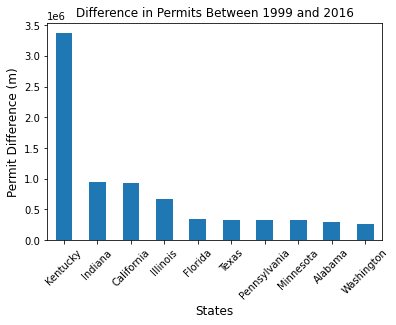

In [301]:
#To visualize the data, I plotted the difference in permits between 1999 and 2016 by state for the top 10 states.
#To format tick marks, I referenced this site:
#https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
    
all_permit_diff['permit_diff'].plot(kind='bar', title='Difference in Permits Between 1999 and 2016')
plt.xlabel("States", fontsize=12)
plt.ylabel("Permit Difference (m)", fontsize=12)
plt.xticks(rotation=45);

There is still not enough information to determine if states such as Kentucky, Indiana, Florida, and Alabama did not intially issue permits or if the data is just missing for the early years. In visualizing the data, it appears that based on the data, Kentucky had the greatest increase in permits between 1999 and 2016, followed by Indiana, California, and Illinois. 

### Research Question 2  (What is the overall trend in gun transactions between 1999 and 2016? )

In [302]:
#To look at total gun transactions over time, I grouped the data by year and total gun transactions per year.
gun_totals_by_year = df_guns.groupby(['year'])['totals'].sum( )[1:19]
df_guns_totals = pd.DataFrame(gun_totals_by_year) 
df_guns_totals

,totals
year,
1999,9043747
2000,8427096
2001,8820045
2002,8367069
2003,8402244
2004,8579891
2005,8867055
2006,9993057
2007,11162272


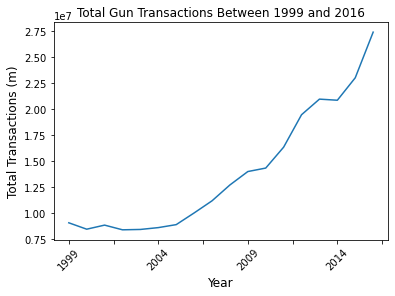

In [303]:
#Next I plotted the transactions by year and total transactions using a line plot.
df_guns_totals['totals'].plot(title='Total Gun Transactions Between 1999 and 2016')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Transactions (m)", fontsize=12)
plt.xticks(rotation=45);

Based on the line plot, we see that total transactions have steadily increased between 1999 and 2016. 

<a id='conclusions'></a>
## Conclusions

Using data from the FBI's National Instant Criminal Background Check System, I examined:

    Which states had the greatest increase in gun permits between 1999 and 2016? 

    The overall trend of gun transactions between 1999 and 2016?

After an inital assessment of the data, I determined that I needed to address missing values using the fillna function. I also, needed to create two new columns to separate the month and year from the month column so that I could look at the data by year rather than by month/year. Since this was central to my investigation< i also had to confirm that I had full year data for each of the years I was exploring. As a result of finding that 1998 only contained data for two months and 2017 only contained data for the first nine months, but all other years had data for all twelve months, I decided to compare data between 1999 and 2016.

I determined the total number of permits issued for each yer and found the difference for each state. I then sorted the permit difference by state and found the top ten states with the greatest increase in permits.

In conclusion, the state with the greatest increase in permits between 1999 and 2016 was Kentucky, with an increase of over 3 million permits during this time period. At a distant second was Indiana followed by California, both with an increase of over 900,000 permits and finally Illinois. Florida, Texas, Pennsylvania, Minnesota, Alabama, and Washington round out the top 10 states with the greatest increase in permits during this time. 

Interestingly, on June 27, 2019, Kentucky "became the 16th state to allow gun owners to carry concealed firearms in public without training or a permit." (Source: https://www.thetrace.org/rounds/daily-bulletin-kentucky-permitless-carry-nics-notification/)

Next, I looked at total gun transactions across states during this same time period. I found the total number of gun trasnactions per year and then plotted the transactions against year to see if there were any noticable trends. 
The overall trend in total gun transactions during this time shows a steady increase from under one million annually in 1999 to over 2.5 million transactions in 2016.



In [304]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255